# 第一个机器学习算法：k-近邻（k-Nearest Neighbor，KNN）算法

### 1 概述

k-近邻算法采用测量不同特征值之间的距离方法进行分类。
* 优点：精度高 对异常值不敏感 无数据输入假定
* 缺点：计算复杂度高 空间复杂度高
* 适用数据范围：数值型 标称型

该方法的思路是：如果一个样本在特征空间中的k个最相似（即特征空间中最邻近）的样本中的大多数属于某一个类别，则该样本也属于这个类别。

### 2 先从简单的入手

来看k-近邻算法一个最简单的版本：只考虑一个最近邻，此时只需要找一个离预测数据点最近的训练数据点。测试数据集如下：

In [1]:
# 引入包
import sys
sys.path.append('../lib')
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston

# 引入数据
boston = load_boston()
X, y = mglearn.datasets.load_extended_boston()
mglearn.plots.plot_knn_classification(n_neighbors=1)

> 如图所示，五角星表示的预测点分别找到了离它们最近的测试数据点，所以归为对应数据点的分类

下面来看k = 3时的情况：

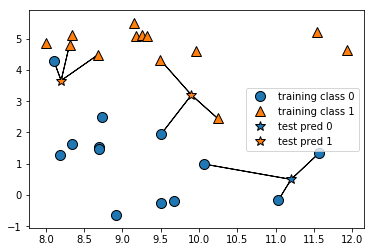

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

 > 此时，预测数据点的分类由三个最近邻居中占多数点的分类决定

### 3 手写一个k-近邻算法

一般来说，k-近邻算法的流程如下：
1. 收集数据：可以使用任何方法
2. 准备数据：距离计算所需要的数值
3. 分析数据：可以使用任何方法
4. 训练算法：不需要
5. 测试算法：计算错误率
6. 使用算法：首先输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续处理

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import operator

# 创建数据集函数，已经标记了坐标位置与已知标签（已知条件）
def create_data_set():
    group = np.array([[0.7, 1.1],
                      [1.0, 1.0],
                      [0.0, 0.0],
                      [0.0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

下面分析一下应该对预测点做什么：
1. 计算已知点集中每个点与当前点之间点距离并排序
2. 选取距离最小的k个点
3. 确定前k个点所在类别的出现频率
4. 返回最高频率类别作为预测点的类别

根据以上分析，有下面的函数：

In [4]:
'''
@param X n*2维矩阵，预测点集
@param data n*2维矩阵，输入点训练样本集
@param labels n维列向量，标签集合
@param k 近邻个数
'''
def classify0(X, data, labels, k):
    
    # 用欧式距离公式计算距离
    dataset_size = data.shape[0]
    diff_mat = np.tile(X, (dataset_size, 1)) - data
    sq_diff_mat = diff_mat ** 2
    sq_distances = sq_diff_mat.sum(axis=1)
    distances = sq_distances ** 0.5
    sorted_dist_indicies = distances.argsort()
    
    # 选择距离最小的k个点
    class_count = {}
    for i in range(k):
        vote_label = labels[sorted_dist_indicies[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    
    # 对结果进行排序
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count[0][0]

In [5]:
group, labels = create_data_set()
classify0([0.5, 0.7], group, labels, 3)

'A'

In [6]:
classify0([0.5, 0.4], group, labels, 3)

'B'

下面我们多预测几个点，并把结果纳入训练集：

In [7]:
def classify1(X_pred, data, labels, k):
    data_temp = data
    labels_temp = labels
    
    # 更新数据集
    for i in range(len(X_pred)):
        new_label = classify0(X_pred[i], data_temp, labels, k)        
        data_temp = np.concatenate((data_temp, [X_pred[i]]), axis=0)
        labels_temp.append(new_label)
        print(labels_temp)
        
    # 训练集可视化
    for i in range(len(labels_temp)):
        if labels_temp[i] == 'A':
            plt.plot(data_temp[i, 0], data_temp[i, 1], 'ob')
        else:
            plt.plot(data_temp[i, 0], data_temp[i, 1], 'xr')
    plt.show()

['A', 'A', 'B', 'B', 'B']
['A', 'A', 'B', 'B', 'B', 'A']
['A', 'A', 'B', 'B', 'B', 'A', 'B']
['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A']
['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B']
['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A']
['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A']
['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'B']
['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A']
['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B']


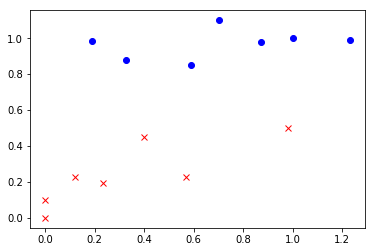

In [8]:
pred = np.array([
    [0.4, 0.45],
    [0.325, 0.88],
    [0.57, 0.23],
    [0.188, 0.982],
    [0.235, 0.196],
    [1.23, 0.989],
    [0.59, 0.849],
    [0.12, 0.23],
    [0.87, 0.98],
    [0.98, 0.5]
])
group, labels = create_data_set()
classify1(pred, group, labels, 2)

### 4 算法评价

* 一般来说，KNeighbors 分类器有2个重要参数：邻居个数与数据点之间距离的度量方法。在实践中，使用较小的邻居个数（比如3个或5个）往往可以得到比较好的结果，但你应该调节这个参数。默认使用欧式距离，它在许多情况下的效果都很好。

* k-NN的优点之一就是模型很容易理解，通常不需要过多调节就可以得到不错的性能。在考虑使用更高级的技术之前，尝试此算法是一种很好的基准方法。

* 构建最近邻模型的速度通常很快，但如果训练集很大（特征数很多或者样本数很大），预测速度可能会比较慢。

* 使用k-NN 算法时，对数据进行预处理是很重要的。这一算法对于有很多特征（几百或更多）的数据集往往效果不好，对于大多数特征的大多数取值都为0的数据集（所谓的稀疏数据集）来说，这一算法的效果尤其不好。

* 虽然k近邻算法很容易理解，但由于预测速度慢且不能处理具有很多特征的数据集，所以在实践中往往不会用到。